### Initial Exploration. 

Brief description of the project. 

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. The nature of predictions made by the classification model will translate as follows:

True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

Data Description
The data provided is a transformed version of original data which was collected using sensors.
Train.csv - To be used for training and tuning of models.
Test.csv - To be used only for testing the performance of the final best model.
Both the datasets consist of 40 predictor variables and 1 target variable

In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### Files to dataframe.

In [11]:
df_train = pd.read_csv("../dataset/Train.csv")
df_test = pd.read_csv("../dataset/Test.csv")

##### Basic information of the df. 

In [12]:
df_train.groupby(df_train.dtypes)

In [13]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


Looks like that we have 41 columns or features in this dataset. 

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

##### Percentage of nulls. 

The percentage of nulls is minimum in the entire dataset.

In [15]:
# Calculate null percentage for each variable
null_percentage_per_variable = (df_train.isnull().sum() / len(df_train)) * 100

# Display null percentage for each variable
print("Null percentage for each variable:")
print(null_percentage_per_variable[null_percentage_per_variable != 0])

Null percentage for each variable:
V1    0.09
V2    0.09
dtype: float64


In [16]:
null_percentage_per_variable[null_percentage_per_variable != 0].values.mean()

0.09

##### Basic stats

In [17]:
df_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


##### Initial visulizations.  

The data pesents a normal distribution as we can observe in the followign graph. 

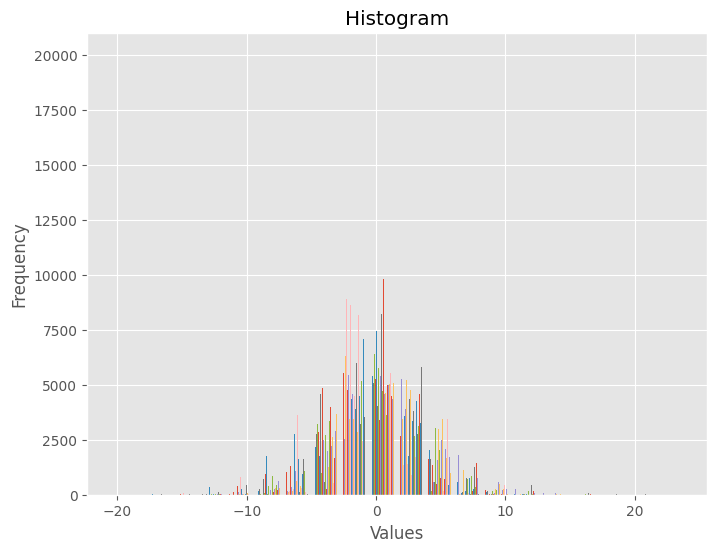

In [22]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Change the values (width, height) as needed

# Plotting the histogram
plt.hist(df_train, bins=20)  # Adjust bins and other parameters as necessary

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Set the style
plt.style.use('ggplot')
# Show the plot
plt.show()

Boxplot 

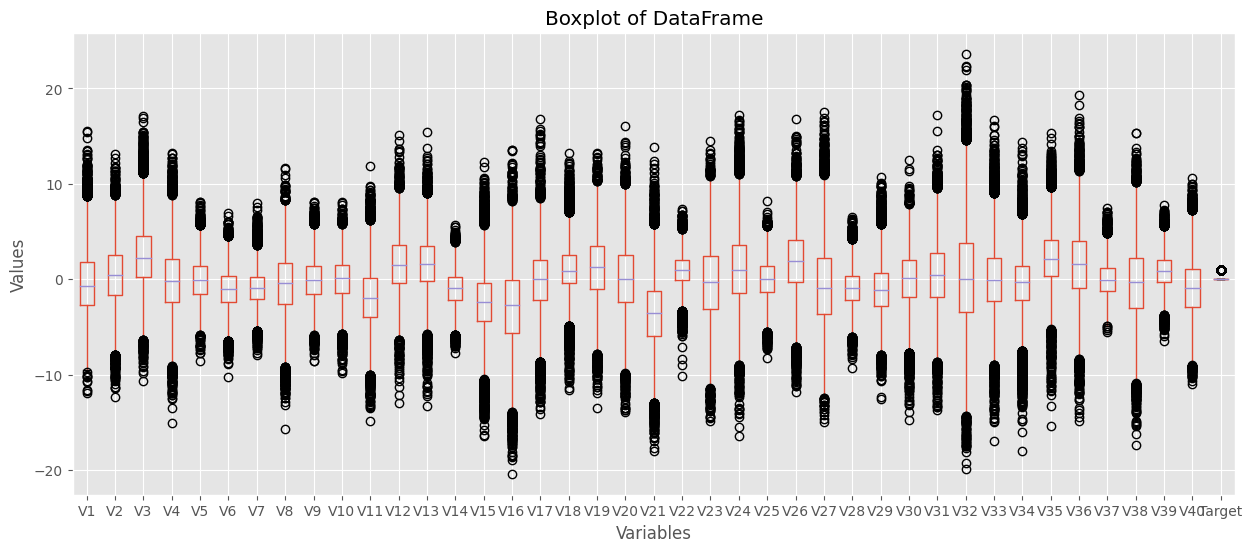

In [23]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
df_train.boxplot()

plt.title('Boxplot of DataFrame')  # Set a title for the boxplot
plt.xlabel('Variables')  # Label for x-axis if needed
plt.ylabel('Values')  # Label for y-axis if needed

plt.show()

Correlation matrix

There are too many variables so there is a excess of dimensionality, maybe we will need to include PCA or a similar technique. 

In [20]:
selected_columns = df_train.iloc[:, 0:20]

Selected some columns to see some corelation.

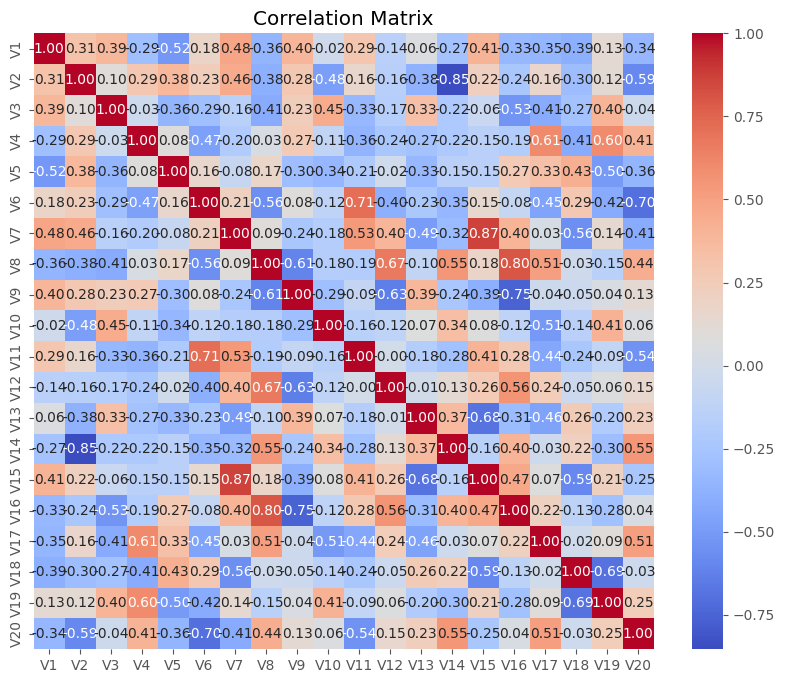

In [21]:
# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap using seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()